## Mars Photogrammetry Preprocessing Pipeline

By Christian Tate, Cornell University; Ithaca, NY

https://github.com/cdt59/MPPP


In [44]:
# Import python modules

import numpy as np
import cv2, glob, time, os
import matplotlib.pyplot as plt

# from planetaryimage import PDS3Image
# import colour_demosaicing
# from PIL import Image
# import matplotlib.cm as cm
# from scipy import interpolate
# from scipy.spatial.transform import Rotation as R
# import colour_demosaicing
import pandas as pd

%run MPPP.py

%matplotlib inline

# time.sleep(60*60)

In [47]:
# Set input path to IMG files and search criteria

pre = ''
suf = 'references'




# Set input and output directories
directory_input  = 'Z:/Mastcam-Z/agisoft/data'
directory_output = 'Z:/Mastcam-Z/agisoft/images'

# directory_input  = 'C:/Users/cdt59/Desktop/heli/data'
# directory_output = 'C:/Users/cdt59/Desktop/heli'

# directory_input  = 'C:/Users/cdt59/Desktop/agisoft/data'
# directory_output = 'C:/Users/cdt59/Desktop/agisoft/images'

# directory_input  = 'C:/Users/cdt59/Downloads/Mars_2020_sol_681/data'
# directory_output = directory_input
# sol = 6

sol = '913'

pre = 'Z*0_0'+str(sol)+'*_0'
suf = 'refs_'+str(sol).zfill(3)+'_zcam'

# pre = '*F_0'+str(sol)+'*_07'
# suf = 'refs_'+str(sol).zfill(3)+'_ecam'

# pre = '*M_0'+str(sol)+'*_07'
# suf = 'refs_'+str(sol).zfill(3)+'_vce_ecam'

# pre = '*V0'+str(sol)+'*_07'
# suf = 'refs_'+str(sol).zfill(3)+'_vec'

# pre = 'HN*_0'+str(sol)+'*_06'
# suf = 'refs_'+str(sol).zfill(3)+'_heli'


sequ_id = ''
index   = ''

path_input     = directory_input
IMG_paths      = [] 
IMG_paths     += sorted( glob.glob(  directory_input + '/' +pre+'*_N*'+sequ_id+'*'+index+'.IMG' ) ) 
IMG_paths     += sorted( glob.glob(  directory_input + '/*/ids/rdr/*/' +pre+'*_N*'+sequ_id+'*'+index+'.IMG' ) ) 

if 'F_0' in pre or 'V' in pre or 'M' in pre: 
    IMG_paths += sorted( glob.glob(  directory_input + '/datadrive/*/ids/rdr/*/' +pre+'*_N*'+sequ_id+'*.IMG' ) ) 
    IMG_paths += sorted( glob.glob(  directory_input + '/datadrive/' +pre+'*_N*'+sequ_id+'*.IMG' ) ) 
if 'Z' in pre: 
    IMG_paths += sorted( glob.glob(  directory_input + '/zcam/' +pre+'*_N*'+sequ_id+'*.IMG' ) ) 
    IMG_paths += sorted( glob.glob(  directory_input + '/zcam/*/' +pre+'*_N*'+sequ_id+'*.IMG' ) ) 


IMG_paths = IMG_paths[:]


print( len(IMG_paths), 'images\n')

# IMG_paths = [ 'Z:/Mastcam-Z/agisoft/data/zcam\\sol_0600s\\ZL0_0690_0728196929_035RAD_N0321184ZCAM08692_0340LMA01.IMG','Z:/Mastcam-Z/agisoft/data/zcam\\sol_0600s\\ZL0_0690_0728198458_034RAD_N0321184ZCAM08692_0340LMA01.IMG' ]

# # remove duplicates in image set

# %run MPPP.py
remove_duplicate_IMGs( IMG_paths )

IMG_paths

133 images

6

keeping   ZR0_0913_0747989355_724RAD_N0450000ZCAM03767_1100LMA02.IMG
removing  ZR0_0913_0747989355_724RAD_N0450000ZCAM03767_1100LMA01.IMG

keeping   ZR0_0913_0747988377_647RAD_N0450000ZCAM08920_1100LMA02.IMG
removing  ZR0_0913_0747988377_647RAD_N0450000ZCAM08920_1100LMA01.IMG

keeping   ZR0_0913_0747989824_285RAD_N0450000ZCAM03014_048085A02.IMG
removing  ZR0_0913_0747989824_285RAD_N0450000ZCAM03014_048085A01.IMG

keeping   ZL0_0913_0747989599_707RAD_N0450000ZCAM03768_1100LMA03.IMG
removing  ZL0_0913_0747989599_707RAD_N0450000ZCAM03768_1100LMA02.IMG
removing  ZL0_0913_0747989599_707RAD_N0450000ZCAM03768_1100LMA01.IMG

keeping   ZR0_0913_0747989659_707RAD_N0450000ZCAM03768_1100LMA02.IMG
removing  ZR0_0913_0747989659_707RAD_N0450000ZCAM03768_1100LMA01.IMG

keeping   ZL0_0913_0747989824_285RAD_N0450000ZCAM03014_048085A02.IMG
removing  ZL0_0913_0747989824_285RAD_N0450000ZCAM03014_048085A01.IMG


['Z:/Mastcam-Z/agisoft/data/zcam\\sol_0900s\\ZL0_0913_0747988294_644RAD_N0450000ZCAM08920_1100LMA01.IMG',
 'Z:/Mastcam-Z/agisoft/data/zcam\\sol_0900s\\ZL0_0913_0747988344_678RAD_N0450000ZCAM08920_1100LMA01.IMG',
 'Z:/Mastcam-Z/agisoft/data/zcam\\sol_0900s\\ZL0_0913_0747988363_644RAD_N0450000ZCAM08920_1100LMA01.IMG',
 'Z:/Mastcam-Z/agisoft/data/zcam\\sol_0900s\\ZL0_0913_0747988377_647RAD_N0450000ZCAM08920_1100LMA01.IMG',
 'Z:/Mastcam-Z/agisoft/data/zcam\\sol_0900s\\ZL0_0913_0747988389_644RAD_N0450000ZCAM08920_1100LMA01.IMG',
 'Z:/Mastcam-Z/agisoft/data/zcam\\sol_0900s\\ZL0_0913_0747988403_644RAD_N0450000ZCAM08920_1100LMA01.IMG',
 'Z:/Mastcam-Z/agisoft/data/zcam\\sol_0900s\\ZL0_0913_0747988417_645RAD_N0450000ZCAM08920_1100LMA01.IMG',
 'Z:/Mastcam-Z/agisoft/data/zcam\\sol_0900s\\ZL0_0913_0747988431_644RAD_N0450000ZCAM08920_1100LMA01.IMG',
 'Z:/Mastcam-Z/agisoft/data/zcam\\sol_0900s\\ZL0_0913_0747988443_644RAD_N0450000ZCAM08920_1100LMA01.IMG',
 'Z:/Mastcam-Z/agisoft/data/zcam\\sol_0900s\\Z

133 images

0 ZL0_0913_0747988294_644RAD_N0450000ZCAM08920_1100LMA01.IMG
sol 913 site 45 drive 0  zenith angle -595 scale 0.92
XYZ_ENU = [-5633.85, 2301.24, 148.58] YPR = [-86, 80, -4]  OPK = [38, 77, 52]

1 ZL0_0913_0747988344_678RAD_N0450000ZCAM08920_1100LMA01.IMG
sol 913 site 45 drive 0  zenith angle -594 scale 0.92
XYZ_ENU = [-5633.87, 2301.24, 148.58] YPR = [-81, 80, -4]  OPK = [52, 73, 38]

2 ZL0_0913_0747988363_644RAD_N0450000ZCAM08920_1100LMA01.IMG
sol 913 site 45 drive 0  zenith angle -592 scale 0.92
XYZ_ENU = [-5633.88, 2301.25, 148.58] YPR = [-76, 80, -4]  OPK = [60, 69, 29]

3 ZL0_0913_0747988377_647RAD_N0450000ZCAM08920_1100LMA01.IMG
sol 913 site 45 drive 0  zenith angle -591 scale 0.92
XYZ_ENU = [-5633.88, 2301.26, 148.58] YPR = [-71, 80, -4]  OPK = [66, 64, 23]

4 ZL0_0913_0747988389_644RAD_N0450000ZCAM08920_1100LMA01.IMG
sol 913 site 45 drive 0  zenith angle -591 scale 0.92
XYZ_ENU = [-5633.89, 2301.26, 148.58] YPR = [-65, 80, -4]  OPK = [69, 60, 19]

5 ZL0_0913_0747988

42 ZL0_0913_0747988955_644RAD_N0450000ZCAM08920_1100LMA01.IMG
sol 913 site 45 drive 0  zenith angle -1398 scale 0.92
XYZ_ENU = [-5633.88, 2301.25, 148.57] YPR = [-78, 66, -2]  OPK = [30, 62, 58]

43 ZL0_0913_0747988969_644RAD_N0450000ZCAM08920_1100LMA01.IMG
sol 913 site 45 drive 0  zenith angle -1596 scale 0.92
XYZ_ENU = [-5633.90, 2301.26, 148.57] YPR = [-72, 62, -2]  OPK = [33, 56, 53]

44 ZL0_0913_0747988986_644RAD_N0450000ZCAM08920_1100LMA01.IMG
sol 913 site 45 drive 0  zenith angle -1595 scale 0.92
XYZ_ENU = [-5633.91, 2301.27, 148.57] YPR = [-67, 62, -2]  OPK = [40, 53, 45]

45 ZL0_0913_0747989002_644RAD_N0450000ZCAM08920_1100LMA01.IMG
sol 913 site 45 drive 0  zenith angle -1597 scale 0.92
XYZ_ENU = [-5633.89, 2301.25, 148.57] YPR = [-78, 62, -2]  OPK = [25, 59, 62]

46 ZL0_0913_0747989019_644RAD_N0450000ZCAM08920_1100LMA01.IMG
sol 913 site 45 drive 0  zenith angle -1598 scale 0.92
XYZ_ENU = [-5633.88, 2301.24, 148.57] YPR = [-84, 62, -2]  OPK = [16, 61, 73]

47 ZL0_0913_07479890

86 ZR0_0913_0747988592_644RAD_N0450000ZCAM08920_1100LMA01.IMG
sol 913 site 45 drive 0  zenith angle -984 scale 0.92
XYZ_ENU = [-5633.74, 2301.47, 148.58] YPR = [-39, 73, 1]  OPK = [68, 38, 14]

87 ZR0_0913_0747988610_649RAD_N0450000ZCAM08920_1100LMA01.IMG
sol 913 site 45 drive 0  zenith angle -984 scale 0.92
XYZ_ENU = [-5633.75, 2301.47, 148.58] YPR = [-44, 73, 1]  OPK = [66, 43, 16]

88 ZR0_0913_0747988625_678RAD_N0450000ZCAM08920_1100LMA01.IMG
sol 913 site 45 drive 0  zenith angle -984 scale 0.92
XYZ_ENU = [-5633.76, 2301.48, 148.58] YPR = [-49, 73, 1]  OPK = [64, 48, 19]

89 ZR0_0913_0747988638_646RAD_N0450000ZCAM08920_1100LMA01.IMG
sol 913 site 45 drive 0  zenith angle -986 scale 0.92
XYZ_ENU = [-5633.79, 2301.48, 148.58] YPR = [-60, 73, 1]  OPK = [57, 57, 28]

90 ZR0_0913_0747988651_646RAD_N0450000ZCAM08920_1100LMA01.IMG
sol 913 site 45 drive 0  zenith angle -989 scale 0.92
XYZ_ENU = [-5633.83, 2301.48, 148.58] YPR = [-81, 73, 1]  OPK = [24, 71, 64]

91 ZR0_0913_0747988668_644RAD_

130 ZR0_0913_0747989659_707RAD_N0450000ZCAM03768_1100LMA02.IMG
sol 913 site 45 drive 0  zenith angle -625 scale 0.91
XYZ_ENU = [-5633.90, 2301.28, 148.58] YPR = [158, 79, 2]  OPK = [-78, -23, -176]

ZR0_0913_0747989824_285RAD_N0450000ZCAM03014_048085A01.IMG failed to process! 

132 ZR0_0913_0747989824_285RAD_N0450000ZCAM03014_048085A02.IMG
resizing image size (688, 624, 3) by padding = [ left, right, top, bottom ] = [ 0, 1024, 0, 512 ]
sol 913 site 45 drive 0  zenith angle -2002 scale 0.91
XYZ_ENU = [-5633.77, 2301.23, 148.56] YPR = [101, 55, 2]  OPK = [-12, -54, -106]

saved Z:/Mastcam-Z/agisoft/images/sols_0900-0999_sci/positions_refs_913_zcam_site3_20230925-133626.txt
Wall time: 6min 52s


<Figure size 640x480 with 0 Axes>

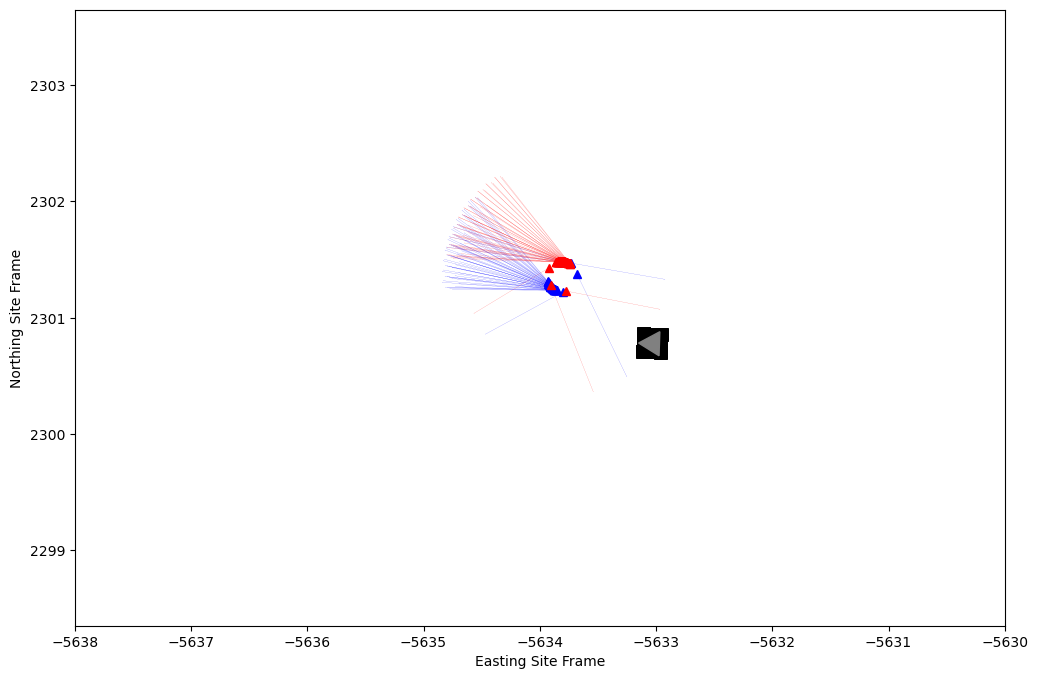

In [48]:
%%time


%run MPPP.py

# image_list_process( IMG_paths[::-1], directory_output, suf, find_offsets_mode = 1 )
# image_list_process( IMG_paths[:], directory_output, suf, find_offsets_mode = 0, frame='rnav' )
# image_list_process( IMG_paths[:], directory_output, suf, find_offsets_mode = 0, frame='site3' 
image_list_process( IMG_paths[:], directory_output, suf, angles='opk' )

In [15]:
%run MPPP.py

# im = image( 'C:/Users/cdt59/Desktop/heli/data//HSF_0174_0682390593_685RAD_N0120001HELI00005_000085J02.IMG' ) # (70,40,2)
# im = image( 'C:/Users/cdt59/Desktop/heli/data//00174//ids//rdr//heli//HNM_0174_0682390574_405RAD_N0120001HELI02729_0000LUJ02.IMG', ) # (140,0,0)
# im = image( 'C:/Users/cdt59/Desktop/agisoft/data\\00784\\ids\\rdr\\ncam\\NLF_0784_0736548853_487RAD_N0390926NCAM03784_0A0195J01.IMG' )
# im = image( 'C:/Users/cdt59/Desktop/agisoft/data\\00784\\ids\\rdr\\ncam\\NRF_0784_0736548853_487RAD_N0390926NCAM03784_0A0195J01.IMG' )
# # im = image( 'C:/Users/cdt59/Desktop/agisoft/data/zcam\\ZL0_0786_0736703534_098RAD_N0390926ZCAM08811_1100LMA01.IMG' ) 
# im = image( 'C:/Users/cdt59/Desktop/agisoft/data/zcam\\ZL0_0792_0737263387_769RAD_N0390926ZCAM01023_034050A01.IMG' ) 
# im = image( 'C:/Users/cdt59/Desktop/agisoft/data/zcam\\ZR0_0792_0737263387_769RAD_N0390926ZCAM01023_034050A01.IMG' ) 

im = image( IMG_paths[0] )

im.image_reference()


im.f, im.b1, im.b2, '', im.cxp, im.cyp, '', im.k1, im.k2, im.theta_degrees, im.filename

(1776.5739368132386,
 7.7945583299242571,
 0.14435256642479594,
 '',
 21.088818562000142,
 -38.804771724379862,
 '',
 0.46850399999999998,
 -0.052846400000000002,
 -89.995364862794602,
 'HSF_0193_0684072325_101RAD_N0130001HELI00000_000085J02.IMG')

<Figure size 640x480 with 0 Axes>

In [16]:
(im.label)

PVLModule([
  ('ODL_VERSION_ID', 'ODL3')
  ('RECORD_TYPE', 'FIXED_LENGTH')
  ('RECORD_BYTES', 8416)
  ('FILE_RECORDS', 9364)
  ('LABEL_RECORDS', 3)
  ('^IMAGE_HEADER', 4)
  ('^IMAGE', 5)
  ('GEOMETRY_PROJECTION_TYPE', 'RAW')
  ('IMAGE_TYPE', 'REGULAR')
  ('IMAGE_ACQUIRE_MODE', 'IMAGE')
  ('INSTRUMENT_TYPE', 'IMAGING CAMERA')
  ('INSTRUMENT_VERSION_ID', 'FM')
  ('MISSION_NAME', 'MARS 2020')
  ('MISSION_PHASE_NAME', 'PRIMARY SURFACE MISSION')
  ('PRODUCER_INSTITUTION_NAME',
   'MULTIMISSION INSTRUMENT PROCESSING LAB, JET PROPULSION LAB')
  ('SPACECRAFT_CLOCK_CNT_PARTITION', 1)
  ('TARGET_NAME', 'MARS')
  ('TARGET_TYPE', 'PLANET')
  ('FRAME_ID', 'MONO')
  ('FRAME_TYPE', 'MONO')
  ('INSTRUMENT_HOST_ID', 'M20')
  ('INSTRUMENT_HOST_NAME', 'INGENUITY HELICOPTER')
  ('INSTRUMENT_ID', 'HELI_RTE')
  ('INSTRUMENT_NAME', 'HELICOPTER RETURN TO EARTH CAMERA')
  ('INSTRUMENT_SERIAL_NUMBER', '5003')
  ('ROVER_MOTION_COUNTER', [13, 0])
  ('ROVER_MOTION_COUNTER_NAME', ['FLIGHT', 'POS'])
  ('SPACECRAFT_C

In [ ]:
int(im.filename[9:19])

In [ ]:

cmod_xml = "<?xml version=\"1.0\" encoding=\"UTF-8\"?><calibration>\n  <projection>{}</projection>\n  <width>{}</width>\n  <height>{}</height>\n  <f>{:0.6f}</f>\n  <cx>{:0.6f}</cx>\n  <cy>{:0.6f}</cy>\n  <k1>{:0.6f}</k1>\n  <k2>{:0.6f}</k2>\n  <p1>{:0.6f}</p1>\n  <p2>{:0.6f}</p2>\n  <k3>{:0.6f}</k3>\n  <k4>{:0.6f}</k4>\n  <b1>{:0.6f}</b1>\n  <b2>{:0.6f}</b2>\n</calibration>"\
            .format( im.projection, im.w, im.h, im.f, im.cxp, im.cyp, im.k1, im.k2, im.p1, im.p2, im.k3, im.k4, im.b1, im.b2 )

print(cmod_xml)

cmod_save_path = 'C:/Users/cdt59/Documents/MPPP_workspace/cmods/M2020_ZR0_034mm.xml'
with open(cmod_save_path, "w") as text_file:
    text_file.write( cmod_xml )

In [ ]:
N = 3
D_min = 1.8
[ D_min*N/(N-n) for n in range(1,N)]

In [42]:

path_ref_est = 'positions_estimated_sol174_20230914_shifted.txt'


df = pd.read_csv( path_ref_est, skiprows=1 )

sol  = '174'
sols = np.array( [ df['#Label'][i][5:8] for i in range(df.shape[0]) ])

dfe = df[ (np.isnan(df['X_est']) == False)*( sols == sol ) ].sort_values(by=['#Label']).reset_index(drop=True)

dfe['X0'] = np.zeros( dfe.shape[0])
dfe['Y0'] = np.zeros( dfe.shape[0])
dfe['Z0'] = np.zeros( dfe.shape[0])

dfe['sclk'] = [np.float64( dfe['#Label'][i][9:19])+np.float64( dfe['#Label'][i][20:23])/1000 for i in range(dfe.shape[0])]

# dfe = dfe[:-10]

dfe

,#Label,Enable,X,Y,Z,Yaw,Pitch,Roll,Error_(m),X_error,...,X_est,Y_est,Z_est,Yaw_est,Pitch_est,Roll_est,X0,Y0,Z0,sclk
0,HNM_0174_0682390505_440RAD_N0120001HELI00650_0...,0,-680.49766,-709.50322,4.75238,140.33999,-1.42048,-3.86947,1.738962,0.790181,...,-679.707479,-707.965653,4.940770,141.222121,-1.466859,-2.414270,0.0,0.0,0.0,6.823905e+08
1,HNM_0174_0682390506_334RAD_N0120001HELI00677_0...,0,-680.47257,-709.57672,5.64043,140.51251,-1.12693,-4.42793,1.770965,0.750021,...,-679.722549,-707.983698,5.830344,141.404804,-1.148181,-2.957536,0.0,0.0,0.0,6.823905e+08
2,HNM_0174_0682390507_233RAD_N0120001HELI00704_0...,0,-680.47551,-709.65411,6.52592,140.89823,-1.31139,-4.96688,1.803354,0.708437,...,-679.767073,-708.006642,6.715797,141.806386,-1.326545,-3.493523,0.0,0.0,0.0,6.823905e+08
3,HNM_0174_0682390508_126RAD_N0120001HELI00731_0...,0,-680.46717,-709.70693,7.42667,140.60028,-1.70618,-4.67771,1.866924,0.713358,...,-679.753812,-707.991088,7.606701,141.424758,-1.772082,-3.378003,0.0,0.0,0.0,6.823905e+08
4,HNM_0174_0682390509_029RAD_N0120001HELI00758_0...,0,-680.43716,-709.75925,8.31698,140.79501,-1.88214,-4.24562,1.933196,0.683511,...,-679.753649,-707.958542,8.482839,141.664075,-1.864615,-2.965657,0.0,0.0,0.0,6.823905e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,HSF_0174_0682390593_685RAD_N0120001HELI00005_0...,0,-454.41642,-644.11651,9.55625,73.59206,41.46678,5.34911,19.197534,-6.973305,...,-461.389725,-626.253814,8.638413,67.324308,43.517097,2.974567,0.0,0.0,0.0,6.823906e+08
190,HSF_0174_0682390605_635RAD_N0120001HELI00006_0...,0,-486.90238,-654.38600,9.60504,73.77318,44.45293,5.20443,17.579971,-7.080418,...,-493.982798,-638.549581,6.753563,67.270584,47.658238,3.642532,0.0,0.0,0.0,6.823906e+08
191,HSF_0174_0682390614_693RAD_N0120001HELI00007_0...,0,-523.90992,-666.43753,9.44600,70.77227,46.36668,0.78329,14.601471,-5.435213,...,-529.345133,-653.437875,5.615810,64.400464,47.377194,-0.116655,0.0,0.0,0.0,6.823906e+08
192,HSF_0174_0682390638_664RAD_N0120001HELI00008_0...,0,-593.23973,-688.55884,8.87698,70.04935,59.27483,-2.02329,5.318427,-1.128528,...,-594.368258,-683.370199,8.576822,63.491395,53.753663,0.651656,0.0,0.0,0.0,6.823906e+08


In [83]:
w,h = [640,480]


Xp,Yp,Zp,yp,pp,rp = [-482.863524,-649.370648,10.150207,162.253878,-5.142142,-9.563955]

f, cxp, cyp, k1, k2, b1, b2 = [275.5,2.2541485333336087,11.026877077021922,-0.0086719433263928569,0.0031444070599917777,0,0]


In [84]:
R_cam2ned  = R.from_matrix( [[0,-1,0],[1,0,0],[0,0,1]] ) 


for i in range(len(IMG_paths)):
    
    IMG_path = IMG_paths[i]
    im = image( IMG_path ) 
    filename = im.filename[:-4] + '.png'
    
    try:
        df_ = dfe[ dfe['#Label'] == filename ].iloc[0]
        found = True
    except:
        found = False
    
    if found:

        Xp,Yp,Zp,yp,pp,rp =  [ df_.X_est, df_.Y_est, df_.Z_est, df_.Yaw_est, df_.Pitch_est, df_.Roll_est ]

        im.image_reference()

        ypr = np.array([yp,pp,rp])
        R_site2cam = find_R_from_ypr( ypr )
        # R_cam2ned  = R.from_matrix( [[0,-1,0],[1,0,0],[0,0,1]] )

        R_cam2site = R_cam2ned.inv() * R_site2cam #R_veh2cam * R_veh2site.inv()

        C = [ Yp, Xp, -Zp ]

        cx = cxp+w/2
        cy = cyp+h/2

        K_cam = np.array([
                    [ f+b1, b2, cx ],
                    [    0,  f, cy ],
                    [    0,  0,  1 ], ])

        HVA = np.matmul( K_cam, R_cam2site.as_matrix() )
        H = HVA[0,:]
        V = HVA[1,:]
        A = HVA[2,:]
        O = A
        Ra = np.array([0,k1,k2])
        E = np.array([0.0,0.0,0.0])

        hp = ( H - cx* A ) / f
        vp = ( V - cy* A ) / f

        GEOMETRIC_CAMERA_MODEL = im.label['GEOMETRIC_CAMERA_MODEL']
        GEOMETRIC_CAMERA_MODEL['REFERENCE_COORD_SYSTEM_NAME']  = 'SITE_FRAME'
        GEOMETRIC_CAMERA_MODEL['REFERENCE_COORD_SYSTEM_INDEX'] = '3'

        GEOMETRIC_CAMERA_MODEL['MODEL_COMPONENT_1'] = list( C )
        GEOMETRIC_CAMERA_MODEL['MODEL_COMPONENT_2'] = list( A )
        GEOMETRIC_CAMERA_MODEL['MODEL_COMPONENT_3'] = list( H )
        GEOMETRIC_CAMERA_MODEL['MODEL_COMPONENT_4'] = list( V )
        GEOMETRIC_CAMERA_MODEL['MODEL_COMPONENT_5'] = list( O )
        GEOMETRIC_CAMERA_MODEL['MODEL_COMPONENT_6'] = list( Ra )
        GEOMETRIC_CAMERA_MODEL['MODEL_COMPONENT_Y'] = list( E )

        text = [im.filename, C[0], C[1], C[2], A[0], A[1], A[2],  H[0], H[1], H[2], V[0], V[1], V[2], O[0], O[1], O[2], Ra[0], Ra[1], Ra[2], E[0], E[1], E[2], ]

        np.savetxt( im.filename[:-4]+'.cmod', text[:], delimiter=',', fmt='%s ' )
        print( im.filename[:-4]+'.cmod' )


HNM_0174_0682390505_440RAD_N0120001HELI00650_0000LUJ01.IMG
HNM_0174_0682390505_440RAD_N0120001HELI00650_0000LUJ01.cmod
HNM_0174_0682390506_334RAD_N0120001HELI00677_0000LUJ01.IMG
HNM_0174_0682390506_334RAD_N0120001HELI00677_0000LUJ01.cmod
HNM_0174_0682390507_233RAD_N0120001HELI00704_0000LUJ01.IMG
HNM_0174_0682390507_233RAD_N0120001HELI00704_0000LUJ01.cmod
HNM_0174_0682390508_126RAD_N0120001HELI00731_0000LUJ01.IMG
HNM_0174_0682390508_126RAD_N0120001HELI00731_0000LUJ01.cmod
HNM_0174_0682390509_029RAD_N0120001HELI00758_0000LUJ01.IMG
HNM_0174_0682390509_029RAD_N0120001HELI00758_0000LUJ01.cmod
HNM_0174_0682390509_920RAD_N0120001HELI00785_0000LUJ01.IMG
HNM_0174_0682390509_920RAD_N0120001HELI00785_0000LUJ01.cmod
HNM_0174_0682390510_814RAD_N0120001HELI00812_0000LUJ01.IMG
HNM_0174_0682390510_814RAD_N0120001HELI00812_0000LUJ01.cmod
HNM_0174_0682390511_708RAD_N0120001HELI00839_0000LUJ01.IMG
HNM_0174_0682390511_708RAD_N0120001HELI00839_0000LUJ01.cmod
HNM_0174_0682390512_605RAD_N0120001HELI00866_000

HNM_0174_0682390568_137RAD_N0120001HELI02540_0000LUJ01.IMG
HNM_0174_0682390568_137RAD_N0120001HELI02540_0000LUJ01.cmod
HNM_0174_0682390569_033RAD_N0120001HELI02567_0000LUJ01.IMG
HNM_0174_0682390569_033RAD_N0120001HELI02567_0000LUJ01.cmod
HNM_0174_0682390569_930RAD_N0120001HELI02594_0000LUJ01.IMG
HNM_0174_0682390569_930RAD_N0120001HELI02594_0000LUJ01.cmod
HNM_0174_0682390570_824RAD_N0120001HELI02621_0000LUJ01.IMG
HNM_0174_0682390570_824RAD_N0120001HELI02621_0000LUJ01.cmod
HNM_0174_0682390571_726RAD_N0120001HELI02648_0000LUJ01.IMG
HNM_0174_0682390571_726RAD_N0120001HELI02648_0000LUJ01.cmod
HNM_0174_0682390572_617RAD_N0120001HELI02675_0000LUJ01.IMG
HNM_0174_0682390572_617RAD_N0120001HELI02675_0000LUJ01.cmod
HNM_0174_0682390573_511RAD_N0120001HELI02702_0000LUJ02.IMG
HNM_0174_0682390573_511RAD_N0120001HELI02702_0000LUJ02.cmod
HNM_0174_0682390574_405RAD_N0120001HELI02729_0000LUJ02.IMG
HNM_0174_0682390574_405RAD_N0120001HELI02729_0000LUJ02.cmod
HNM_0174_0682390575_302RAD_N0120001HELI02756_000

HNM_0174_0682390629_938RAD_N0120001HELI04403_0000LUJ02.IMG
HNM_0174_0682390629_938RAD_N0120001HELI04403_0000LUJ02.cmod
HNM_0174_0682390630_835RAD_N0120001HELI04430_0000LUJ02.IMG
HNM_0174_0682390630_835RAD_N0120001HELI04430_0000LUJ02.cmod
HNM_0174_0682390631_734RAD_N0120001HELI04457_0000LUJ02.IMG
HNM_0174_0682390631_734RAD_N0120001HELI04457_0000LUJ02.cmod
HNM_0174_0682390632_628RAD_N0120001HELI04484_0000LUJ02.IMG
HNM_0174_0682390632_628RAD_N0120001HELI04484_0000LUJ02.cmod
HNM_0174_0682390633_519RAD_N0120001HELI04511_0000LUJ02.IMG
HNM_0174_0682390633_519RAD_N0120001HELI04511_0000LUJ02.cmod
HNM_0174_0682390634_417RAD_N0120001HELI04538_0000LUJ02.IMG
HNM_0174_0682390634_417RAD_N0120001HELI04538_0000LUJ02.cmod
HNM_0174_0682390635_311RAD_N0120001HELI04565_0000LUJ02.IMG
HNM_0174_0682390635_311RAD_N0120001HELI04565_0000LUJ02.cmod
HNM_0174_0682390636_208RAD_N0120001HELI04592_0000LUJ02.IMG
HNM_0174_0682390636_208RAD_N0120001HELI04592_0000LUJ02.cmod
HNM_0174_0682390637_102RAD_N0120001HELI04619_000

In [ ]:
# For find_offset_mode = 1

# # pos_lines  = []
# # rover_xyzs = []
# # im_xyzs    = []
# # sols       = []
# # rmcs = []
sites  = [ rmcs[i][0] for i in range(len(rmcs))[::-1] ]
drives = [ rmcs[i][1] for i in range(len(rmcs))[::-1] ]
Xs     = [ rover_xyzs[i][0] for i in range(len(rover_xyzs))[::-1] ]
Ys     = [ rover_xyzs[i][1] for i in range(len(rover_xyzs))[::-1] ]
Zs     = [ rover_xyzs[i][2] for i in range(len(rover_xyzs))[::-1] ]

table = np.stack( [sols[::-1], sites, drives, Xs, Ys, Zs], axis=1)
np.round( table, 4 )

np.savetxt( directory_output+"/offsets.csv", table, delimiter="\t")

In [ ]:
q_T_aim = R.from_euler( 'zyx', (70,38,4),degrees=True )

q_cam2enu = q_T_aim.inv() *q_cam * im.q_G * im.q_M *q_ned2enu

q_cam2enu.as_rotvec(degrees=1)

In [2]:
import urllib.request, json 

'''

https://mars.nasa.gov/mmgis-maps/M20/Layers/json/M20_waypoints.json

https://docs.google.com/spreadsheets/d/1GSNJL-e5iROCaKUC4BXL_OA8hWy8vUdfCN7levRNkZA/edit#gid=1232397498

''' 
# path =  'C:/Users/cornell/Downloads/M20_waypoints.json'
# with open( path ) as f:
#     data = json.load(f)

with urllib.request.urlopen("https://mars.nasa.gov/mmgis-maps/M20/Layers/json/M20_waypoints.json") as url:
    data = json.loads(url.read().decode())

    
site3_E = data['features'][0]['properties']['easting']
site3_N = data['features'][0]['properties']['northing']
site3_A = data['features'][0]['properties']['elev_geoid']


for i in range(len(data['features']))[::-1]:
    
    print( data['features'][i]['properties']['sol'],'\t',
           data['features'][i]['properties']['site'], '\t',
           data['features'][i]['properties']['drive'],'\t',
           '0.0'+'\t','0.0'+'\t','0.0'+'\t',
           np.round( np.float64(data['features'][i]['properties']['easting'])- np.float64(site3_E), 3),'\t',
           np.round( np.float64(data['features'][i]['properties']['northing'])- np.float64(site3_N), 3),'\t',
           np.round( np.float64(data['features'][i]['properties']['elev_geoid'])- np.float64(site3_A), 3),'\t',
         )

911 	 45 	 0 	 0.0	 0.0	 0.0	 -5633.031 	 2300.779 	 146.598 	
911 	 44 	 4982 	 0.0	 0.0	 0.0	 -5628.064 	 2300.562 	 146.364 	
909 	 44 	 4864 	 0.0	 0.0	 0.0	 -5632.466 	 2291.637 	 147.303 	
909 	 44 	 3978 	 0.0	 0.0	 0.0	 -5512.994 	 2287.453 	 154.031 	
907 	 44 	 2258 	 0.0	 0.0	 0.0	 -5238.159 	 2237.599 	 154.989 	
907 	 44 	 2208 	 0.0	 0.0	 0.0	 -5238.611 	 2242.726 	 155.135 	
907 	 44 	 2148 	 0.0	 0.0	 0.0	 -5242.117 	 2246.383 	 155.624 	
905 	 44 	 2062 	 0.0	 0.0	 0.0	 -5235.218 	 2251.019 	 155.464 	
903 	 44 	 1012 	 0.0	 0.0	 0.0	 -5209.054 	 2244.988 	 155.176 	
899 	 44 	 898 	 0.0	 0.0	 0.0	 -5196.203 	 2253.573 	 155.118 	
897 	 44 	 830 	 0.0	 0.0	 0.0	 -5202.007 	 2251.724 	 155.211 	
896 	 44 	 820 	 0.0	 0.0	 0.0	 -5202.042 	 2251.698 	 155.211 	
886 	 44 	 0 	 0.0	 0.0	 0.0	 -5105.002 	 2143.734 	 149.31 	
885 	 43 	 1270 	 0.0	 0.0	 0.0	 -5104.172 	 2144.563 	 149.333 	
884 	 43 	 554 	 0.0	 0.0	 0.0	 -5098.819 	 2280.008 	 152.461 	
872 	 43 	 0 	 0.0	 0

In [ ]:
data['features'][-1]

In [ ]:

HNM_0174_0682390670_246RAD_N0120001HELI05618_0000LUJ02.png	-659.99704	-696.61814	0.00427	-5.22666	-0.51619	-161.39815	0	0	-1
HNM_0193_0684072284_736RAD_N0130001HELI00496_0000LUJ02.png	-654.60816	-707.83441	-0.34953	0.64222	8.10263	-152.55907